In [5]:
import arviz as az
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

import pymc as pm
print(pm.__version__)

5.15.1


In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

# Introduction

https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#pymc-overview

Model 

$$
Y \sim N(\mu, \sigma^2) \\
\mu = \alpha + \beta_1X_1 + \beta_2X_2 \\
\alpha \sim N(0, 100) \\
\beta_i \sim N(0, 100) \\
\sigma \sim \|N(0,1)\|
$$

Data simulation

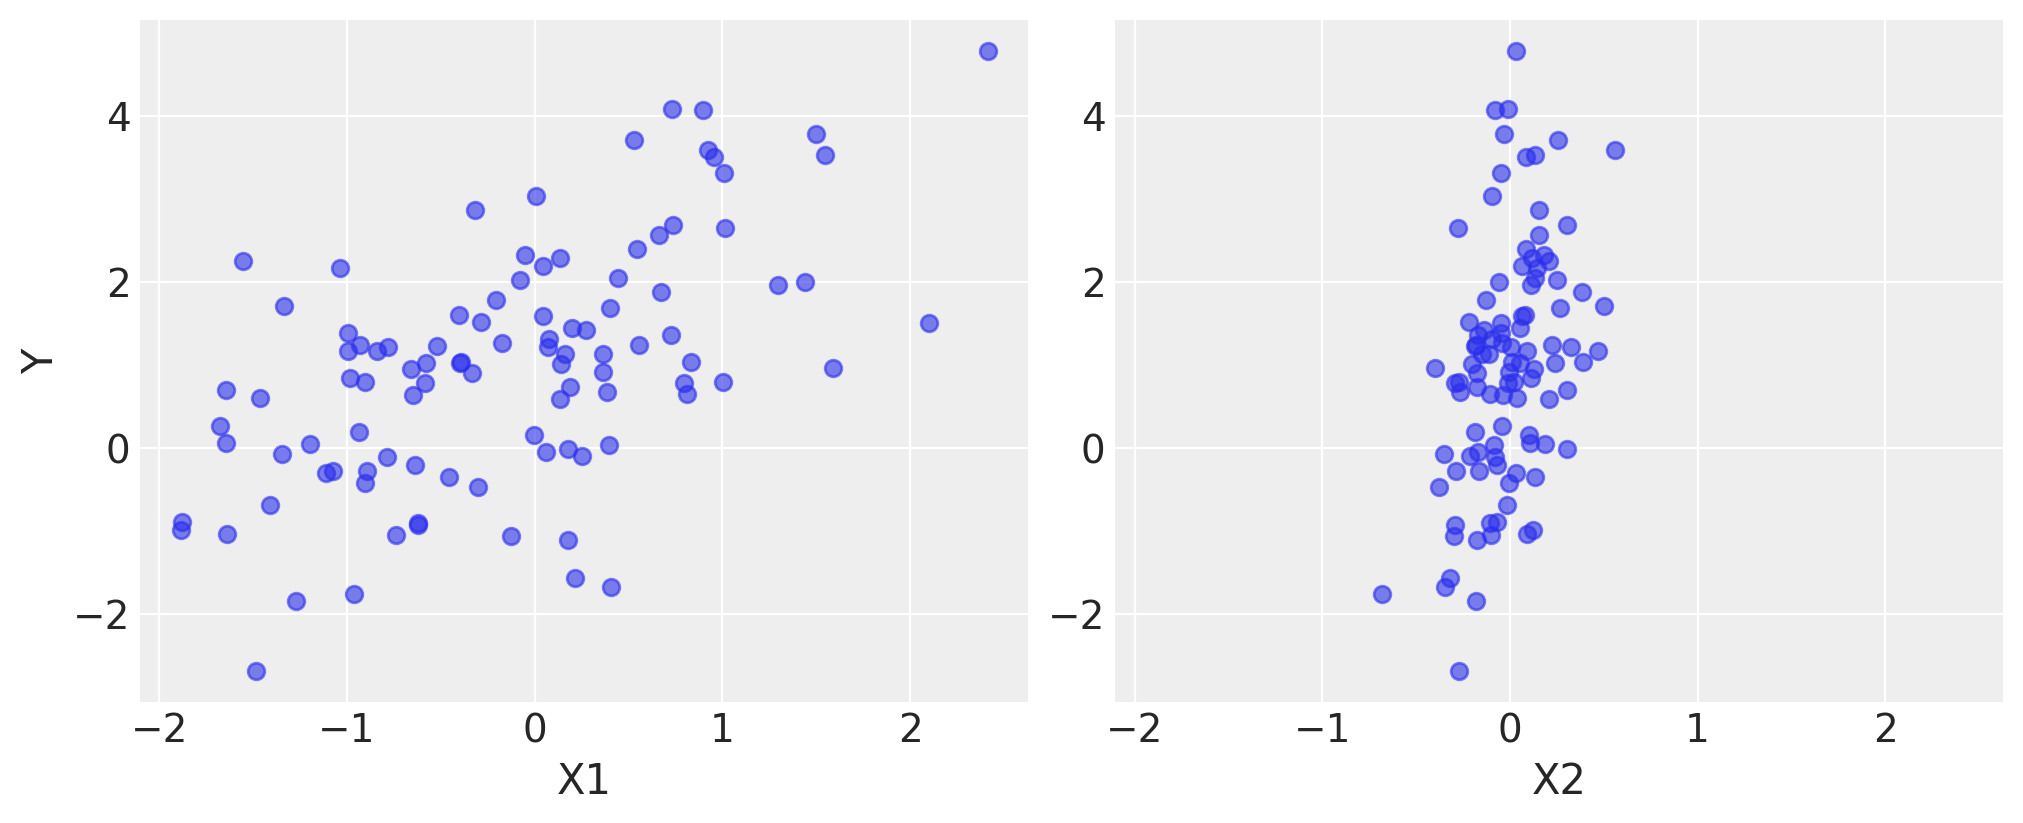

In [3]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma


fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");


modeling with PYMC

In [8]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    # Common used distribution in addition to normmal includes Beta, Exponential, Categorical, Gamma, Binomial
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)


In [7]:
X1

array([-1.19760193,  1.01505714, -0.6233422 , -0.33205975, -1.34827625,
       -0.93628809,  0.38364414,  0.17515366,  1.43914973,  0.19032308,
        0.54369058,  0.1959525 ,  1.01119244, -0.40382314,  0.36296715,
        0.5288472 ,  0.40731248, -0.39578328, -1.27478382, -0.20500646,
       -1.07693585,  0.13328526, -0.96113761, -0.58605407,  0.17920362,
        0.1637487 ,  0.07653548, -0.00646751, -0.90602723, -0.05298363,
       -1.64110236,  0.65980779, -0.65083702,  0.73771393,  0.67110958,
        0.25314532, -0.98676341,  2.41463106,  0.27218497, -0.4565594 ,
       -0.62024879, -0.63834263, -0.84153743, -0.89285333, -0.99310692,
        0.80875262, -1.88727134,  0.14095295, -0.78322792, -0.28544782,
        0.72416711,  0.39451587, -0.52269677, -0.6611837 , -1.41029477,
        0.13516544, -0.99340921,  0.36399097, -0.12494702, -1.48636283,
        0.95324591, -0.390998  ,  0.44226029, -1.1139853 , -0.17704504,
       -1.46164883, -1.64374299, -1.33808966, -0.5809332 ,  0.73